Published on July 10, 2025. By Prata, Marília (mpwolke)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gemma/keras/gemma_2b_en/3/config.json
/kaggle/input/gemma/keras/gemma_2b_en/3/tokenizer.json
/kaggle/input/gemma/keras/gemma_2b_en/3/metadata.json
/kaggle/input/gemma/keras/gemma_2b_en/3/model.weights.h5
/kaggle/input/gemma/keras/gemma_2b_en/3/assets/tokenizer/vocabulary.spm
/kaggle/input/map-charting-student-math-misunderstandings/sample_submission.csv
/kaggle/input/map-charting-student-math-misunderstandings/train.csv
/kaggle/input/map-charting-student-math-misunderstandings/test.csv
/kaggle/input/gemma2/keras/gemma2_2b_en/2/config.json
/kaggle/input/gemma2/keras/gemma2_2b_en/2/tokenizer.json
/kaggle/input/gemma2/keras/gemma2_2b_en/2/metadata.json
/kaggle/input/gemma2/keras/gemma2_2b_en/2/model.weights.h5
/kaggle/input/gemma2/keras/gemma2_2b_en/2/assets/tokenizer/vocabulary.spm


![](https://www.mathcoachscorner.com/wp-content/uploads/2012/07/Planning-for-math-misconceptions.png)https://www.mathcoachscorner.com/2012/07/overcoming-misconceptions/

## About Competition 

MAP  (Misconception Annotation Project) - Charting Student Math Misunderstandings

"In this competition, you’ll develop an NLP model driven by ML to accurately predict students’ potential math misconceptions based on student explanations in open-ended responses. This solution will suggest candidate misconceptions for these explanations, making it easier for teachers to identify and address students’ incorrect thinking, which is critical to improving student math learning."

https://www.kaggle.com/competitions/map-charting-student-math-misunderstandings/overview

## Competition Citation

@misc{map-charting-student-math-misunderstandings,

    author = {Jules King and Kennedy Smith and L Burleigh and Scott Crossley and Maggie Demkin and Walter Reade},
    
    title = {MAP - Charting Student Math Misunderstandings},
    year = {2025},
    
    howpublished = {\url{https://kaggle.com/competitions/map-charting-student-math-misunderstandings}},
    
    note = {Kaggle}
}

## Overcoming Misconceptions for Learning

How Do I Get My Students Over Their Alternative Conceptions (Misconceptions) for Learning?

Authors: Joan Lucariello and David Naff

"Misconceptions can really impede learning for several reasons. First, students generally are unaware that the knowledge they have is wrong. Moreover, misconceptions can be very entrenched in student thinking. In addition, students interpret new experiences through these erroneous understandings, thereby interfering with being able to correctly grasp new information."

"Misconceptions tend to be very resistant to instruction because learning entails replacing or radically reorganizing student knowledge. Hence, conceptual change has to occur for learning to happen. This puts teachers in the very challenging position of needing to bring about significant conceptual change in student knowledge."

"Generally, ordinary forms of instruction, such as lectures, labs, discovery learning, or simply reading texts, are not very successful at overcoming student misconceptions. For all these reasons, misconceptions can be hard nuts for teachers to crack."

"Several instructional strategies have proven to be effective in achieving conceptual change and helping students leave their alternative conceptions behind and learn correct concepts or theories."

### Do's

"Assess students preconceptions, create a bridge of examples, present new concepts or theories, use model-based reasoning, use diverse instruction, Present students with experiences that cause cognitive conflict,engage in Interactive Conceptual Instruction (ICI), Develop students' epistemological thinking, use case studies as teaching tools,help students "self-repair" their misconceptions, engage students in argument to strengthen their newly acquired correct knowledge."

### Dont's

"Do NOT: rely solely on lectures, rely solely on labs or hands-on activities, rely solely on demonstrations, rely solely on having students simply read the text, rely solely on a singular perspective when there are multiple ways to interpret material."

https://www.apa.org/education-career/k12/misconceptions

In [2]:
train = pd.read_csv('../input/map-charting-student-math-misunderstandings/train.csv')
train.tail(3)

,row_id,QuestionId,QuestionText,MC_Answer,StudentExplanation,Category,Misconception
36693,36693,109465,The probability of an event occurring is \( 0....,Unlikely,yeah pretty unlikelyy from what it seems.,False_Neither,NaN
36694,36694,109465,The probability of an event occurring is \( 0....,Unlikely,you have 9 other numbers to get.,False_Neither,NaN
36695,36695,109465,The probability of an event occurring is \( 0....,Unlikely,you have a chanve but it is not i think this b...,False_Neither,NaN


## Load test file (we have only 3 rows)

In [3]:
test = pd.read_csv('../input/map-charting-student-math-misunderstandings/test.csv')
test.tail()

,row_id,QuestionId,QuestionText,MC_Answer,StudentExplanation
0,36696,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),"I think that 1/3 is the answer, as it's the si..."
1,36697,31772,What fraction of the shape is not shaded? Give...,\( \frac{3}{6} \),i think this answer is because 3 triangles are...
2,36698,32835,Which number is the greatest?,\( 6.2 \),because the 2 makes it higher than the others.


### QuestionText 0 and 1 are the same

In [4]:
test['QuestionText'][0]

'What fraction of the shape is not shaded? Give your answer in its simplest form. [Image: A triangle split into 9 equal smaller triangles. 6 of them are shaded.]'

In [5]:
test['StudentExplanation'][0]

"I think that 1/3 is the answer, as it's the simplest form of 3/9."

### Where is written about triangle colors???

In [6]:
test['StudentExplanation'][1]

'i think this answer is because 3 triangles are white and 6 triangle are blue.'

In [7]:
test['QuestionText'][2]

'Which number is the greatest?'

## Submission file. Only 3 rows too.

In [8]:
sub = pd.read_csv('../input/map-charting-student-math-misunderstandings/sample_submission.csv')
sub.tail()

,row_id,Category:Misconception
0,36696,True_Correct:NA False_Neither:NA False_Misconc...
1,36697,True_Correct:NA False_Neither:NA False_Misconc...
2,36698,True_Correct:NA False_Neither:NA False_Misconc...


## info() method.  Missing values only in Misconceptions

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36696 entries, 0 to 36695
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   row_id              36696 non-null  int64 
 1   QuestionId          36696 non-null  int64 
 2   QuestionText        36696 non-null  object
 3   MC_Answer           36696 non-null  object
 4   StudentExplanation  36696 non-null  object
 5   Category            36696 non-null  object
 6   Misconception       9860 non-null   object
dtypes: int64(2), object(5)
memory usage: 2.0+ MB


## Misconception Categories

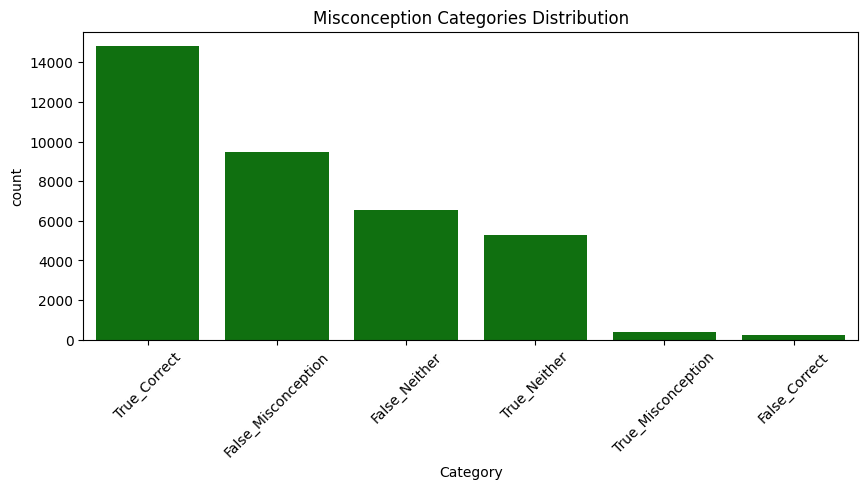

In [10]:
plt.figure(figsize=(10,4))
sns.countplot(data=train, x='Category', order=train['Category'].value_counts().index, color='g')
plt.xticks(rotation=45)
plt.title("Misconception Categories Distribution")
plt.show()

## Top 5 Students Explanations

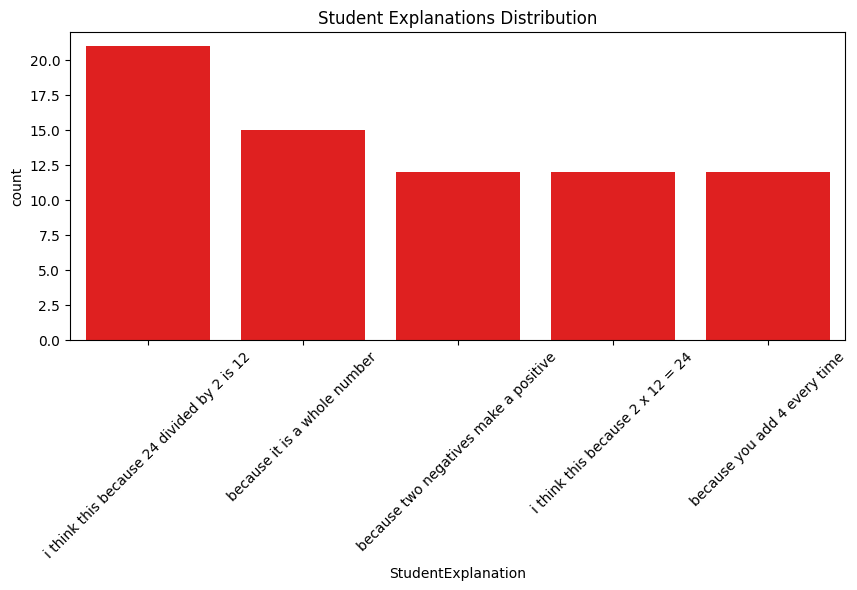

In [11]:
plt.figure(figsize=(10,4))
sns.countplot(data=train, x='StudentExplanation', order=train['StudentExplanation'].value_counts().head().index, color='r')
plt.xticks(rotation=45)
plt.title("Student Explanations Distribution")
plt.show()

## Question: The probability of an event occurring is ...

In [12]:
train['QuestionText'][36694]

'The probability of an event occurring is \\( 0.9 \\).\n\nWhich of the following most accurately describes the likelihood of the event occurring?'

### Funnier StudentExplanation to the question above:

### "you have 9 other numbers to get"

In [13]:
train['StudentExplanation'][36694]

'you have 9 other numbers to get.'

## Misconceptions (Top 20) Distribution

"Misconception - train only - The math misconception identified in the student's explanation for answers. Only applicable when Category contains a misconception, otherwise is 'NA'."

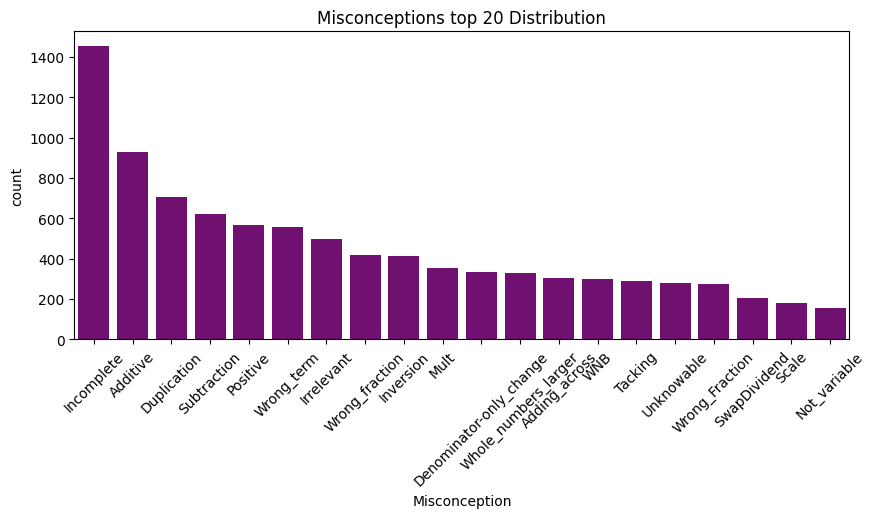

In [14]:
plt.figure(figsize=(10,4))
sns.countplot(data=train, x='Misconception', order=train['Misconception'].value_counts().head(20).index, color='purple')
plt.xticks(rotation=45)
plt.title("Misconceptions top 20 Distribution")
plt.show()

### Misconceptions (15 bottom)

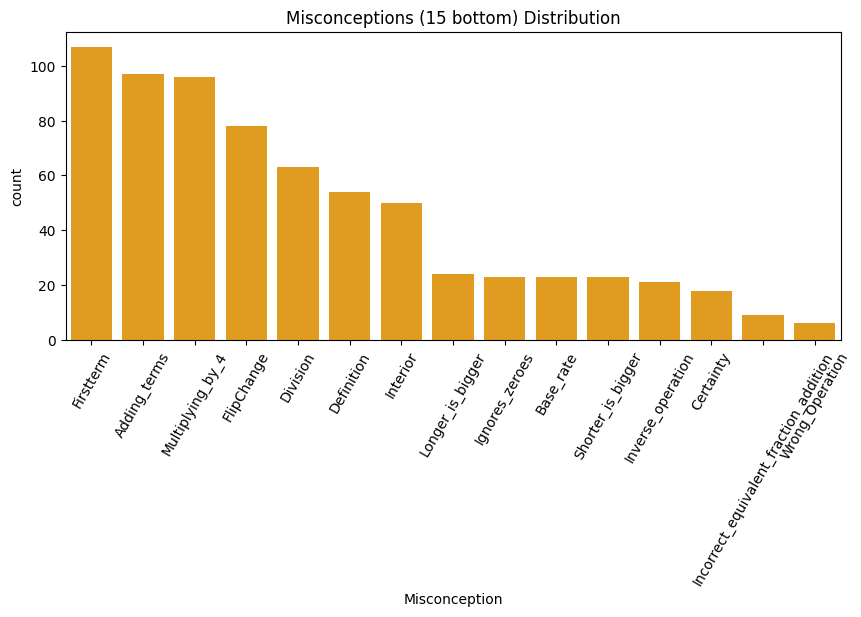

In [15]:
plt.figure(figsize=(10,4))
sns.countplot(data=train, x='Misconception', order=train['Misconception'].value_counts().tail(15).index, color='orange')
plt.xticks(rotation=60)
plt.title("Misconceptions (15 bottom) Distribution")
plt.show()

## Install Keras

In [16]:
# Install Keras 3 last. See https://keras.io/getting_started/ for more details.
!pip install -q -U keras-nlp
!pip install -q -U keras>=3

import os

os.environ["KERAS_BACKEND"] = "jax"  # Or "torch" or "tensorflow".
# Avoid memory fragmentation on JAX backend.
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"]="1.00"

import keras
import keras_nlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.5/876.5 kB 11.6 MB/s eta 0:00:00


2025-07-11 14:09:27.235939: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752242967.523452      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752242967.604672      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Gemma 2b_en

Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'

In [17]:
gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset("gemma_2b_en")
#gemma_lm.summary()

INFO:2025-07-11 14:09:41,411:jax._src.xla_bridge:924: Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:2025-07-11 14:09:41,431:jax._src.xla_bridge:924: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
2025-07-11 14:11:53.340013: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
normalizer.cc(51) LOG(INFO) precompiled_charsmap is empty. use identity normalization.


### MC_Answer - The multiple-choice answer the student selected.

In [18]:
#By York Yong https://www.kaggle.com/code/yorkyong/gemma-trial-ace-a-data-science-interview

MAP_dataset = []
    
for index, row in test.iterrows():
    question, answer = row['QuestionText'], row['MC_Answer']
    template = (f"QuestionText:\n{question}\n\nMC_Answer:\n{answer}")
    MAP_dataset.append(template)

## LoRA

In [19]:
# Enable LoRA for the model and set the LoRA rank to 64.
gemma_lm.backbone.enable_lora(rank=64)

In [20]:
# Limit the input sequence length to 512 (to control memory usage).
gemma_lm.preprocessor.sequence_length = 512
# Use AdamW (a common optimizer for transformer models).
optimizer = keras.optimizers.AdamW(
    learning_rate=5e-5,
    weight_decay=0.01,
)
# Exclude layernorm and bias terms from decay.
optimizer.exclude_from_weight_decay(var_names=["bias", "scale"])

gemma_lm.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizer,
    weighted_metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

## Epochs

Started 22:13 till 22:15 

In [21]:
%%time

gemma_lm.fit(MAP_dataset, epochs=1, batch_size=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 276s 88s/step - loss: 0.2589 - sparse_categorical_accuracy: 0.5559
CPU times: user 15min 31s, sys: 30.5 s, total: 16min 1s
Wall time: 4min 38s


## Without options I didn't get the question

The question is only: "Which number is the greatest?"  No number options to choose.  **Therefore**, I added to the question two numbers to be compared by Gemma model.

Since the MC_Answer (multiple choice) was 6.2 and the student explanation was: "because the 2 makes it higher than the others."  I wrote 6 or 6.2, which is something that makes sense to me.

## I think Gemma misanderstood or I am missing something.

 Gemma's answer: Which number is the greatest 6 or 6.2?

Answer:

Step 1/2
First, we need to compare the whole numbers 6 and 6.2. Since 6 is a whole number, it is already the greatest number.

Step 2/2
**Therefore, the answer is 6.**
CPU times: user 3min 37s, sys: 2.49 s, total: 3min 40s
Wall time: 1min 50s

That's so cute, **Gemma is using "Therefore**".

In [22]:
%%time
print(gemma_lm.generate("Which number is the greatest 6 or 6.2?", max_length=256))

Which number is the greatest 6 or 6.2?

Answer:

Step 1/2
First, we need to compare the whole numbers 6 and 6.2. Since 6 is a whole number, it is already the greatest number.

Step 2/2
Therefore, the answer is 6.
CPU times: user 4min 6s, sys: 3.51 s, total: 4min 10s
Wall time: 2min 7s


## Question two

test['QuestionText'][0]

"What fraction of the shape is not shaded? Give your answer in its simplest form. [Image: A triangle split into 9 equal smaller triangles. 6 of them are shaded."

In [23]:
%%time
print(gemma_lm.generate("A triangle split into nine equal smaller triangles. Six of them are shaded. What fraction of the shape is not shaded?", max_length=256))

A triangle split into nine equal smaller triangles. Six of them are shaded. What fraction of the shape is not shaded?

Step 1
1 of 2

The shaded triangles are 6 out of 9 triangles.

$\dfrac{6}{9}=\dfrac{2}{3} $

Result
2 of 2

$\dfrac{2}{3} $
CPU times: user 2min 57s, sys: 2.55 s, total: 2min 59s
Wall time: 1min 37s


![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQqWGOZcDN2FLh4LXJZ0jUvYqMw2JzqS_msGXTAaaZ1fNU83TlUpXf4DLRN5sP53IZITNw&usqp=CAU)Pinterest

#Acknowledgements:

AI Google Developers https://ai.google.dev/gemma/docs/lora_tuning#load_dataset

York Yong https://www.kaggle.com/code/yorkyong/gemma-trial-ace-a-data-science-interview

Josh Longenecker https://www.kaggle.com/code/joshlongenecker/gemma-summarization

mpwolke https://www.kaggle.com/code/mpwolke/hello-python-functions-with-gemma

mpwolke https://www.kaggle.com/code/mpwolke/what-is-1-1-gemma/notebook